# Pruning in DT

- it refers to the process of reducing/trimming the size of the tree by removing nodes which do not provide significant predictive power or generalization ability

- to prevent `overfitting`

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

### Load the training data

In [2]:
train = pd.read_csv('train_pruning.csv')

In [3]:
train.sample(2).T

,167552,139874
id,167553,139875
Gender,Male,Male
Age,42,38
Driving_License,1,1
Region_Code,8.0,18.0
Previously_Insured,1,0
Vehicle_Age,1-2 Year,1-2 Year
Vehicle_Damage,No,Yes
Annual_Premium,45640.0,68200.0
Policy_Sales_Channel,26.0,124.0


In [4]:
#encoding Gender, Vehicle_Age and vehicle_Damage columns

train['Gender'].replace('Male',1,inplace=True)
train['Gender'].replace('Female',0,inplace=True)

train['Vehicle_Damage'].replace('Yes',1,inplace=True)
train['Vehicle_Damage'].replace('No',0,inplace=True)

train['Vehicle_Age'].replace('1-2 Year',0,inplace=True)
train['Vehicle_Age'].replace('< 1 Year',1,inplace=True)
train['Vehicle_Age'].replace('> 2 Years',2,inplace=True)

In [5]:
train.sample(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
367204,367205,0,22,1,28.0,0,1,0,28836.0,152.0,297,0
23256,23257,0,23,1,15.0,1,0,0,2630.0,124.0,268,0


### Load the test data

In [6]:
test = pd.read_csv('test_pruning.csv')

In [7]:
#encoding Gender, Vehicle_Age and vehicle_Damage columns for test set

test['Gender'].replace('Male',1,inplace=True)
test['Gender'].replace('Female',0,inplace=True)

test['Vehicle_Damage'].replace('Yes',1,inplace=True)
test['Vehicle_Damage'].replace('No',0,inplace=True)

test['Vehicle_Age'].replace('1-2 Year',0,inplace=True)
test['Vehicle_Age'].replace('< 1 Year',1,inplace=True)
test['Vehicle_Age'].replace('> 2 Years',2,inplace=True)

In [8]:
test.sample(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
6611,387721,1,38,1,41.0,0,1,0,2630.0,1.0,15
58503,439613,0,39,1,28.0,0,0,1,2630.0,124.0,133


In [9]:
Xtrain = train.drop(['id', 'Response'], axis=1)

In [10]:
ytrain = train['Response']

In [11]:
ytrain

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [12]:
Xtest = test.drop('id', axis=1)

In [13]:
Xtrain.shape, ytrain.shape, Xtest.shape

((381109, 10), (381109,), (127037, 10))

In [14]:
len(Xtest)/len(Xtrain)*100

33.33350826141602

### Baseline/Basic Decision Tree Model

In [15]:
### Create training and validation set
X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=45)

In [16]:
X_train.shape, X_val.shape

((304887, 10), (76222, 10))

In [17]:
len(X_val)/len(Xtrain)*100

20.000052478424806

### Training the model

In [18]:
X_train.sample()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
132504,0,48,1,28.0,0,0,1,47162.0,25.0,171


In [19]:
base_model = DecisionTreeClassifier()

In [20]:
base_model_DT = base_model.fit(X_train, y_train)

### Predict the validation set

In [21]:
pred_values = base_model_DT.predict(X_val)

### Evaluate the model performance

In [22]:
print(classification_report(y_val, pred_values))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     66875
           1       0.29      0.31      0.30      9347

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.83      0.82      0.83     76222



### Pruning in DT

### Iterate `max_depth` till 30

In [23]:
max_depth=[]
acc_gini=[]
acc_entropy=[]


for i in range(1,31):
    
    ### Gini as a criterion
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_val)
    
    acc_gini.append(accuracy_score(y_val, pred))
    
    
    ### Entropy as a criterion
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_val)
    
    acc_entropy.append(accuracy_score(y_val, pred))
    
    max_depth.append(i)

In [24]:
len(acc_entropy), len(acc_gini), len(max_depth)

(30, 30, 30)

### Create a DataFrame --- required for plotting 

- Combined `3 lists` into a `DataFrame`

In [25]:
df_metric = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
                         'acc_entropy':pd.Series(acc_entropy),
                         'max_depth': pd.Series(max_depth)})

In [26]:
df_metric

,acc_gini,acc_entropy,max_depth
0,0.877371,0.877371,1
1,0.877371,0.877371,2
2,0.877371,0.877371,3
3,0.877371,0.877371,4
4,0.877371,0.877371,5
5,0.877371,0.877371,6
6,0.877332,0.877345,7
7,0.877161,0.877266,8
8,0.876978,0.877253,9
9,0.876729,0.876978,10


### Plot `gini` vs `entropy` values against `max_depth`

In [27]:
plt.style.use('fivethirtyeight')

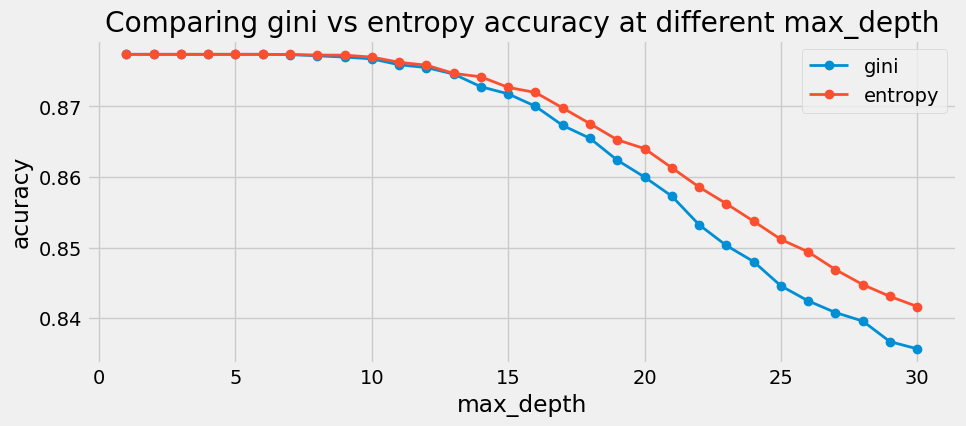

In [28]:
plt.figure(figsize=(10,4))

plt.plot(df_metric['max_depth'], df_metric['acc_gini'], label='gini', linewidth=2, marker='o')
plt.plot(df_metric['max_depth'], df_metric['acc_entropy'], label='entropy', linewidth=2, marker='o')
plt.xlabel('max_depth')
plt.ylabel('acuracy')
plt.title("Comparing gini vs entropy accuracy at different max_depth")
plt.legend()
plt.show()

**the best accuracy score can be achieved at `max_depth` = 1 to 3**

In [29]:
pruned_model = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [33]:
pruned_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
pred_values= pruned_model.predict(X_val)

In [35]:
print(classification_report(y_val, pred_values, zero_division='warn'))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66875
           1       0.00      0.00      0.00      9347

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arvenka\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Accuracy has `improved by ~6%` from the baseline to pruned model

### Task# Perform Hyperparameter Tuning (HPT) and compare the accuracy with baseline and pruned model

### Task# Plot Decision Tree diagram

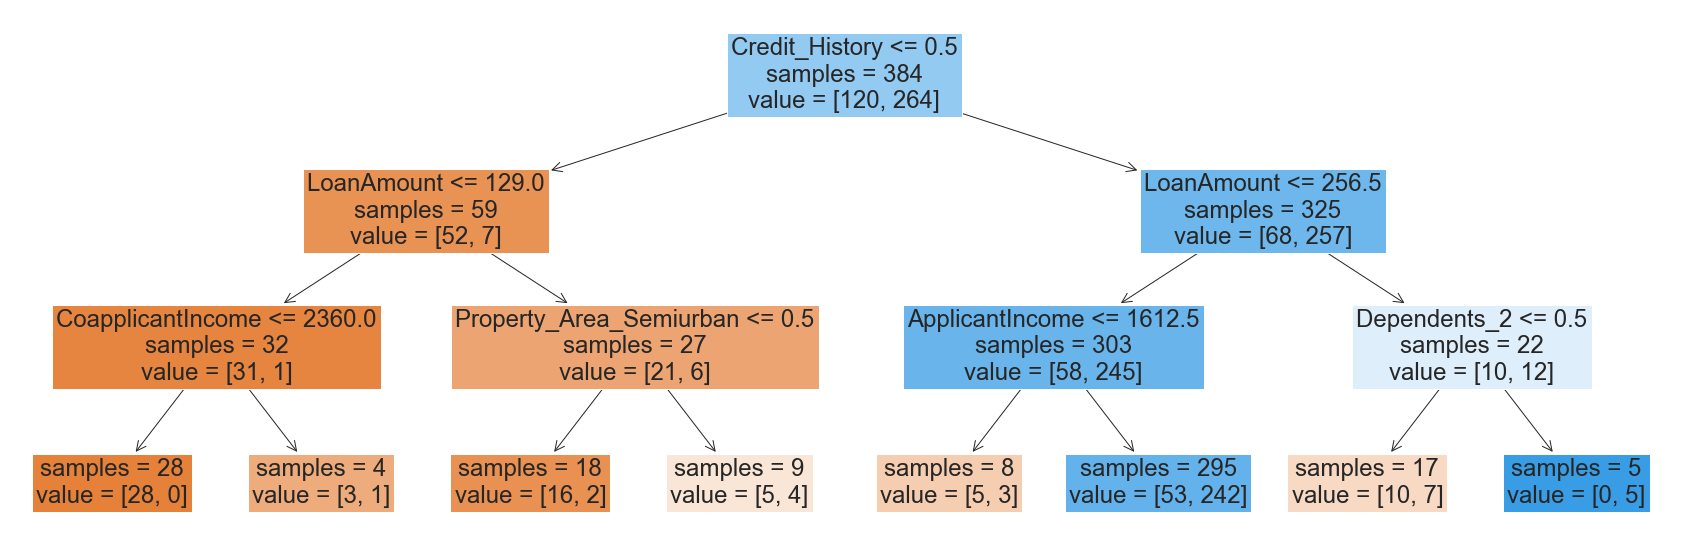

### Install the Sweetviz

In [36]:
pip install Sweetviz

  Obtaining dependency information for Sweetviz from https://files.pythonhosted.org/packages/89/50/8d3f7ca820267a38b42c64778db0f186d85cec6e3f0c5210eab9c16e783f/sweetviz-2.3.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB 640.0 kB/s eta 0:00:24
   ---------------------------------------- 0.0/15.1 MB 487.6 kB/s eta 0:00:31
   ---------------------------------------- 0.0/15.1 MB 487.6 kB/s eta 0:00:31
   ---------------------------------------- 0.0/15.1 MB 487.6 kB/s eta 0:00:31
   ---------------------------------------- 0.1/15.1 MB 187.0 kB/s eta 0:01:21
   ---------------------------------------- 0.1/15.1 MB 217.9 kB/s eta 0:01:10
   ---------------------------------------- 0.1/15.1 MB 294.4 kB/s eta 0:00:51
   ---------------------------------------- 0.1/15.1 MB 387.0 kB/s eta 0:00:39
   ---------------------------------------- 0.1/15.1 MB 387.0 kB/s eta 0:00:39
   ---------------

'C:\Users\arvenka\init.cmd' is not recognized as an internal or external command,
operable program or batch file.


In [37]:
import sweetviz

In [38]:
my_report = sweetviz.analyze([train,'Age'])

                                             |                                             | [  0%]   00:00 ->…


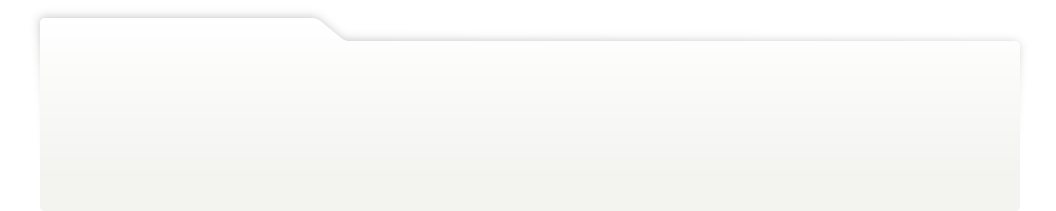
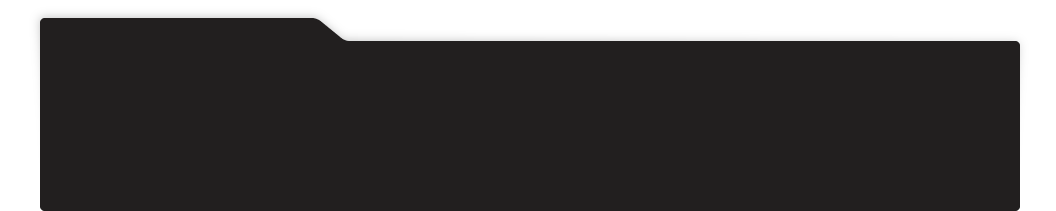
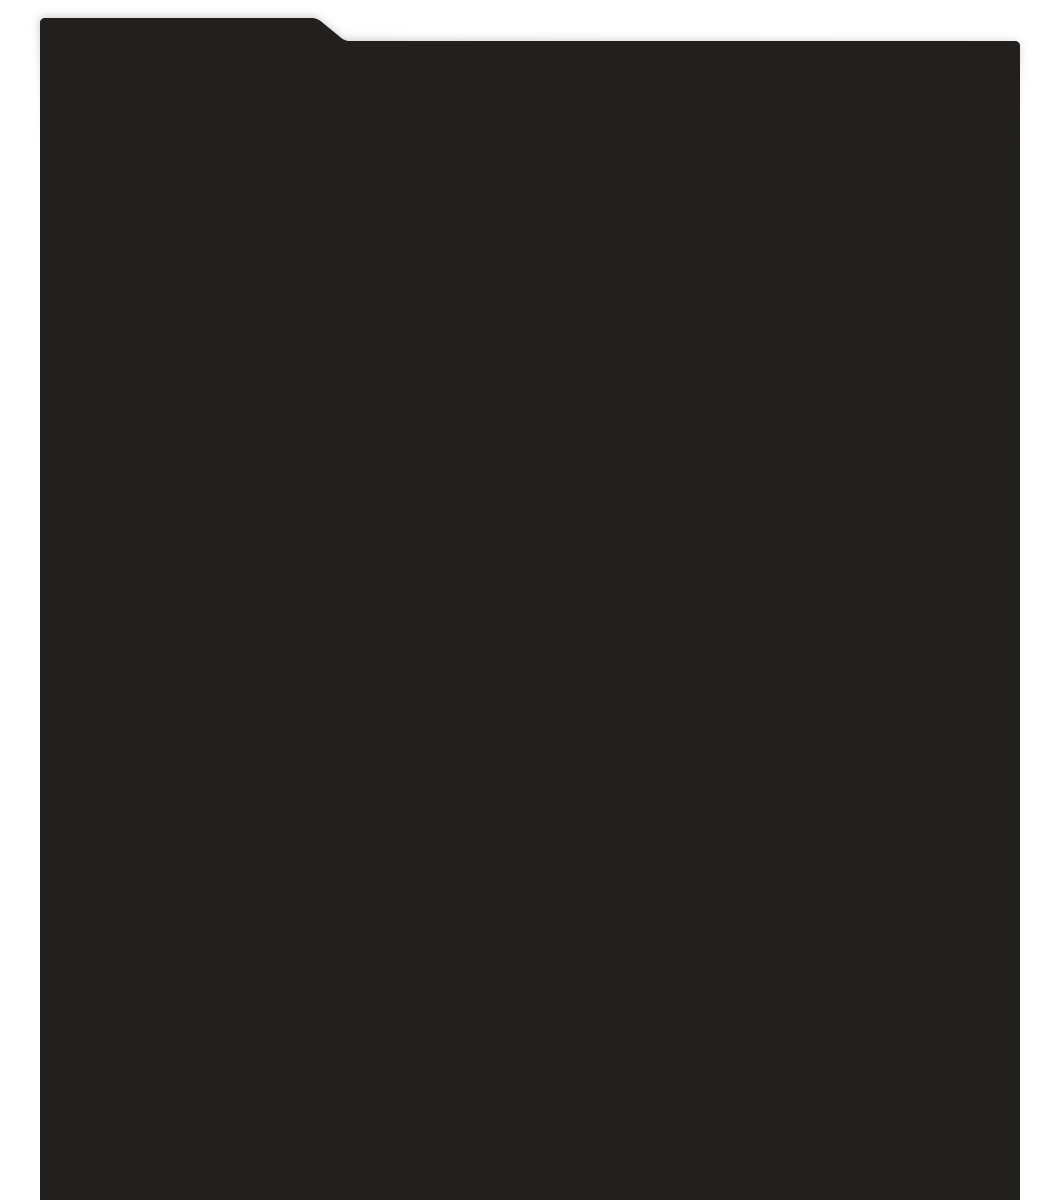
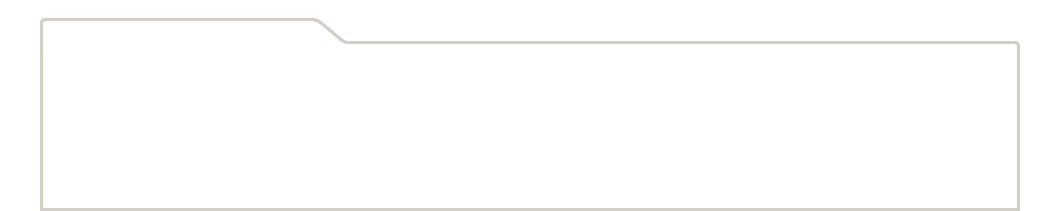
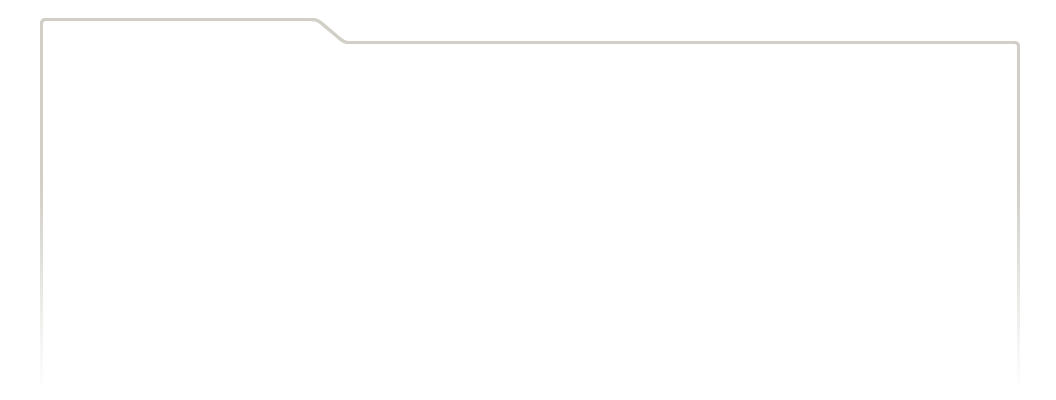
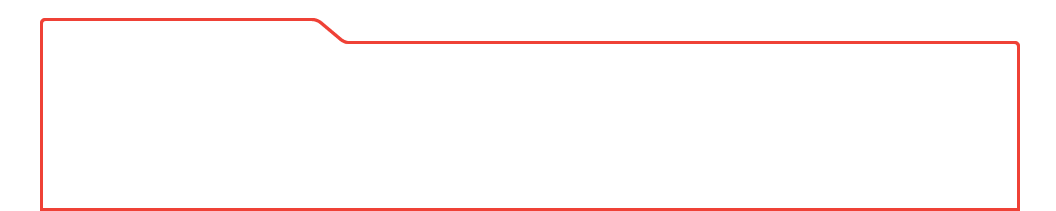
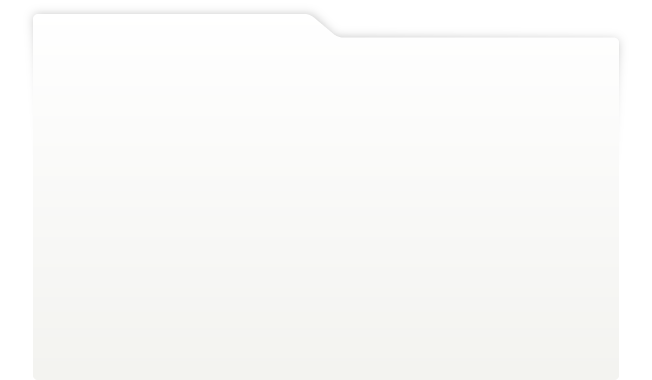
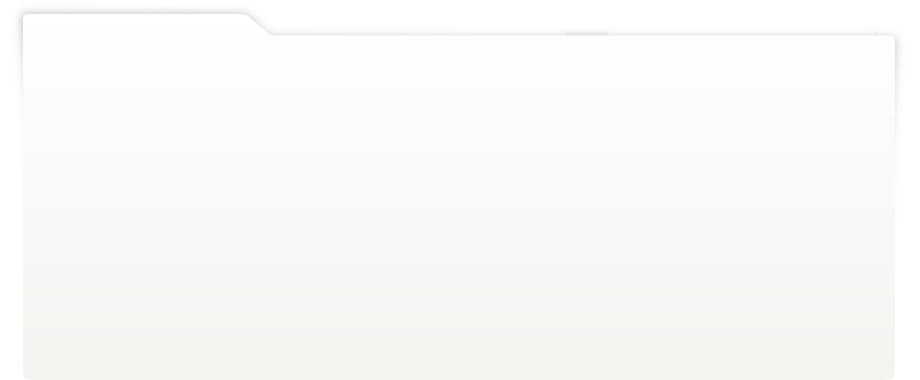
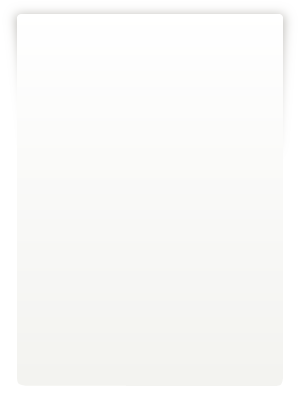
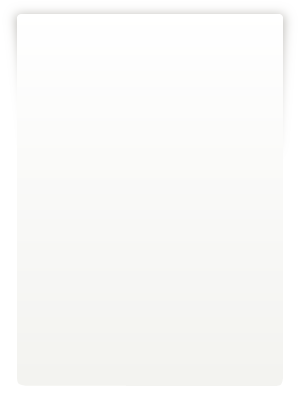
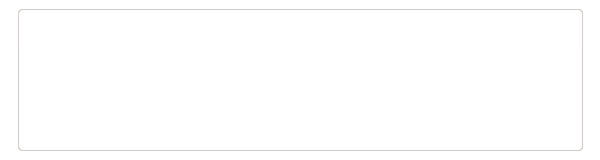
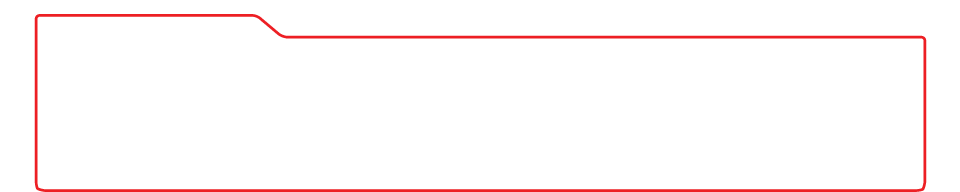
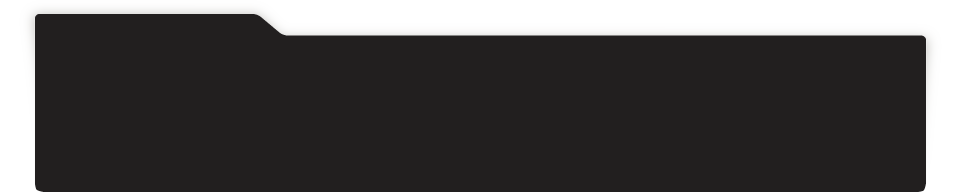
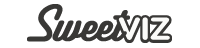
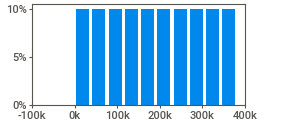
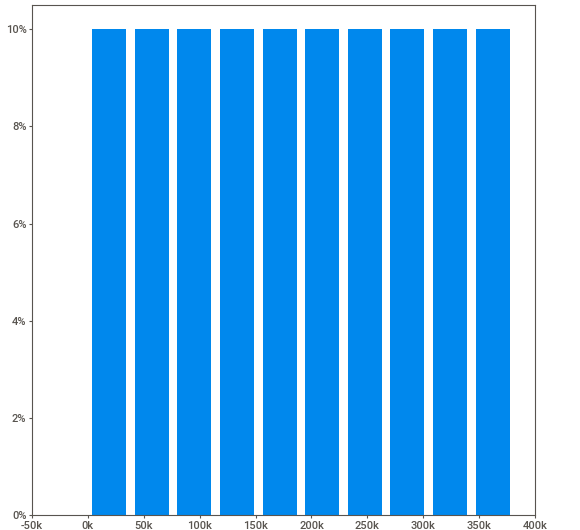
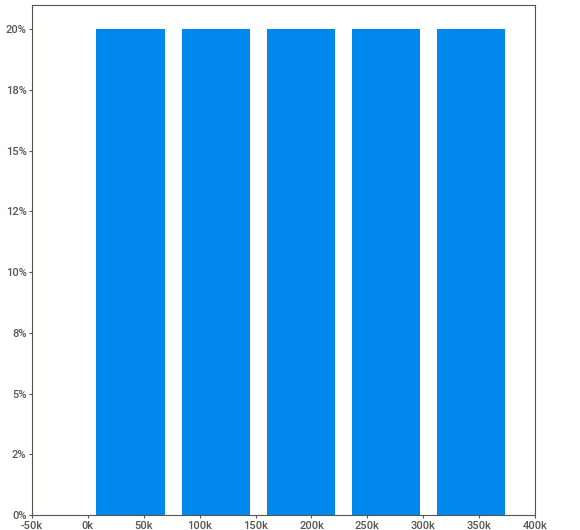
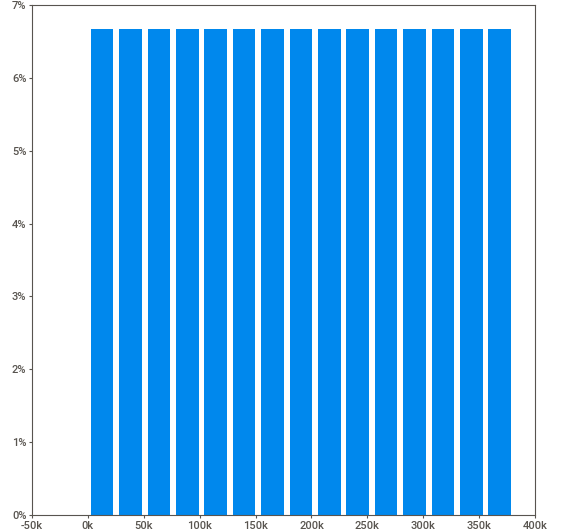
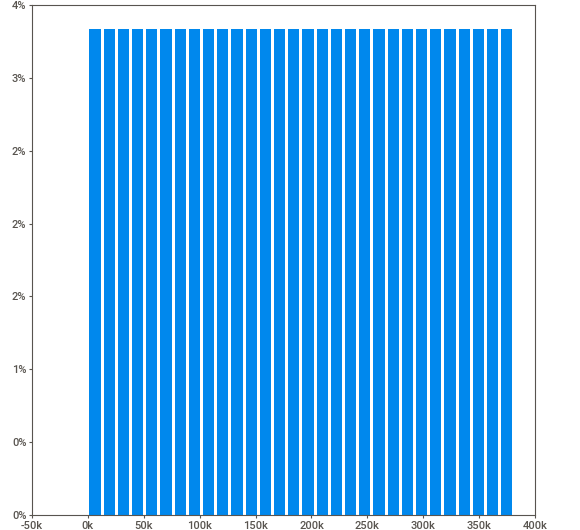
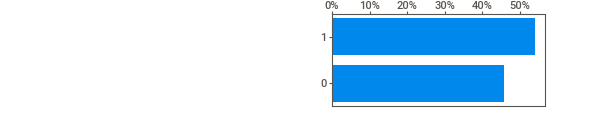
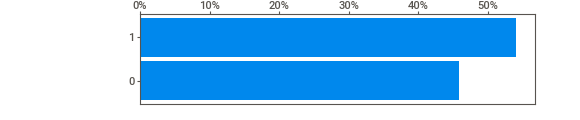
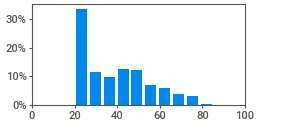
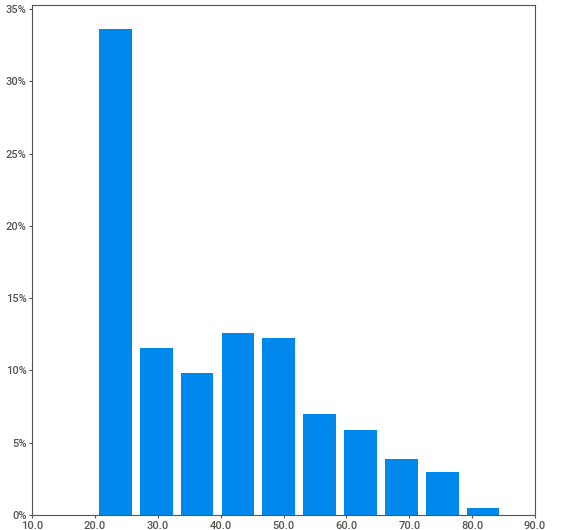
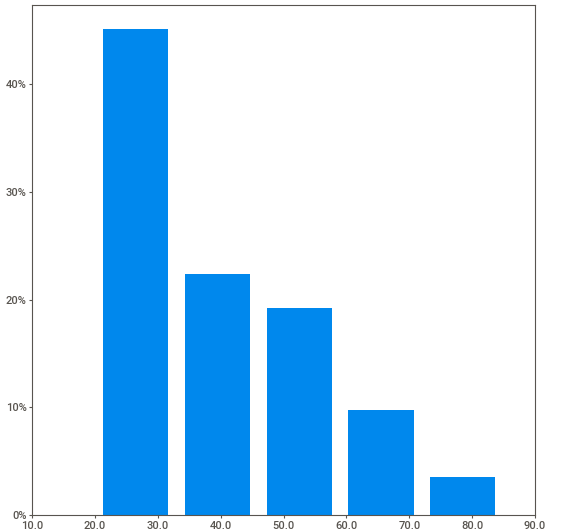
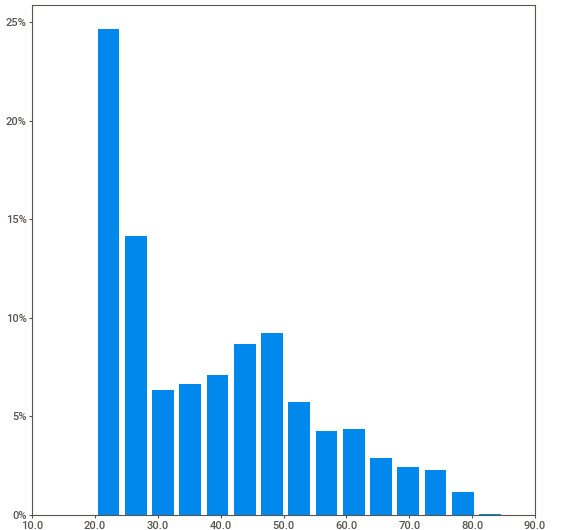
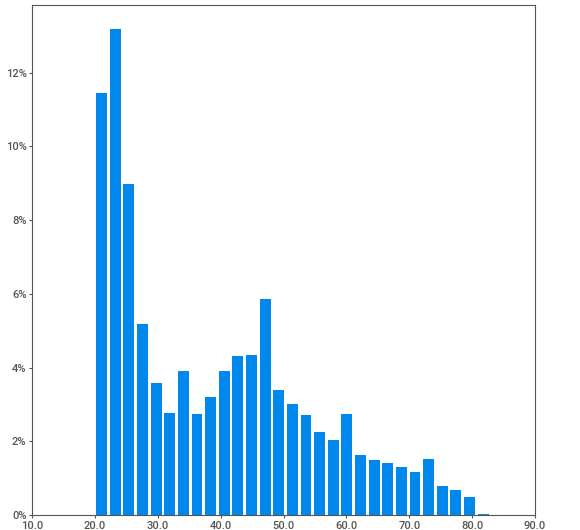
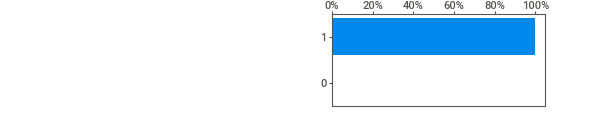
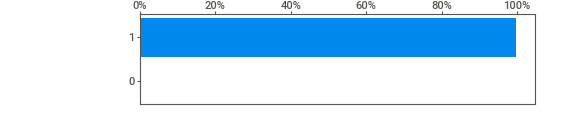
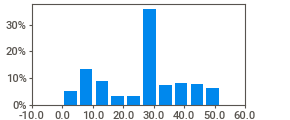
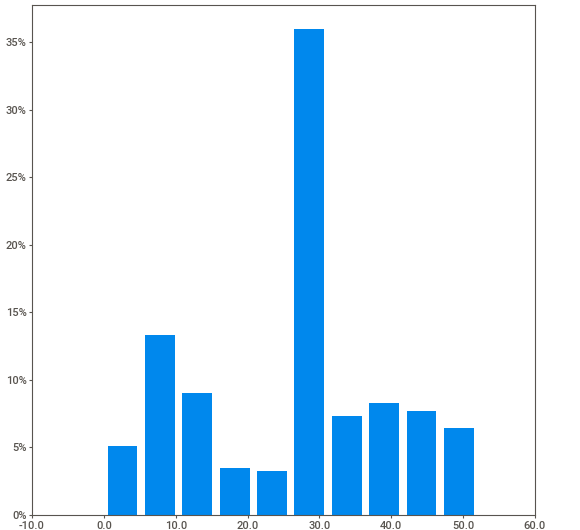
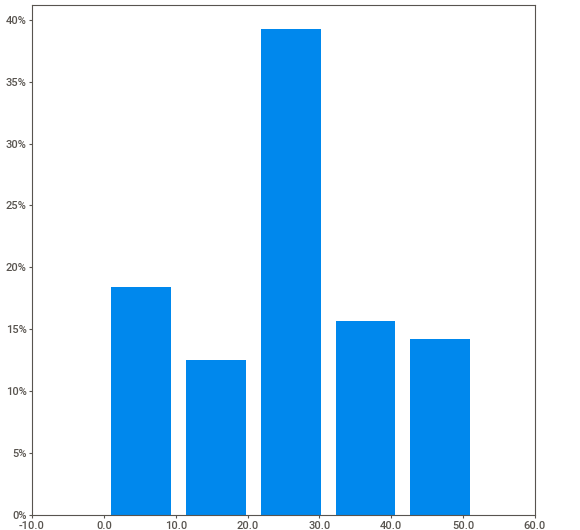
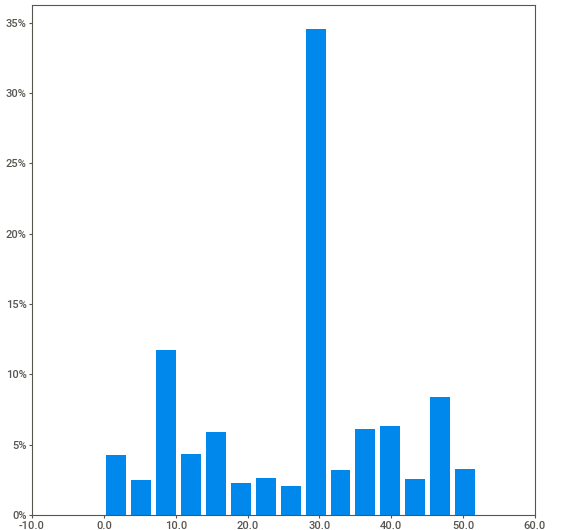
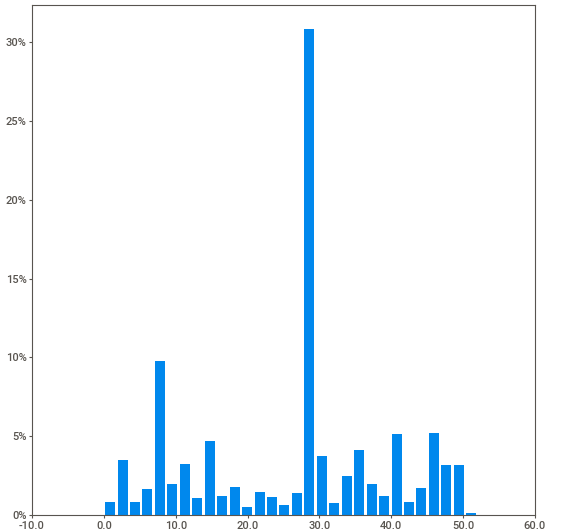
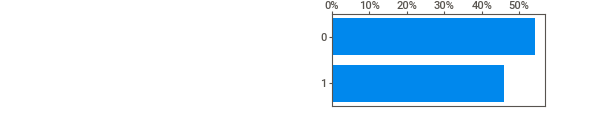
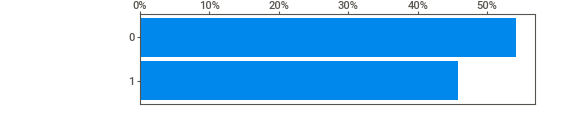
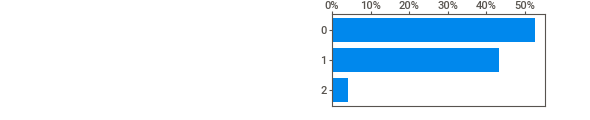
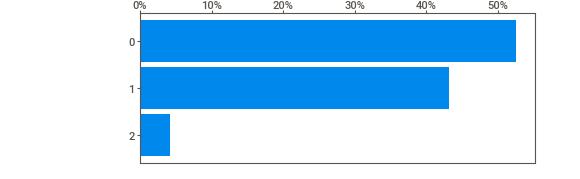
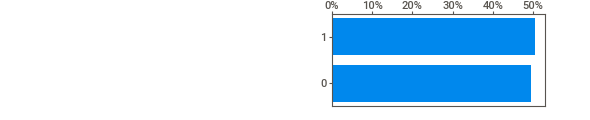
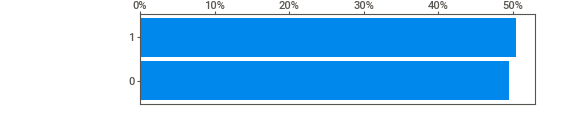
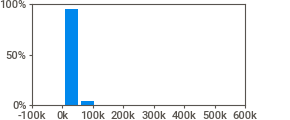
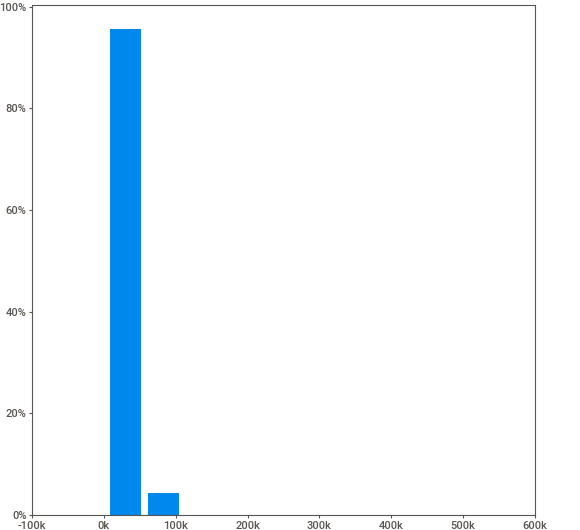
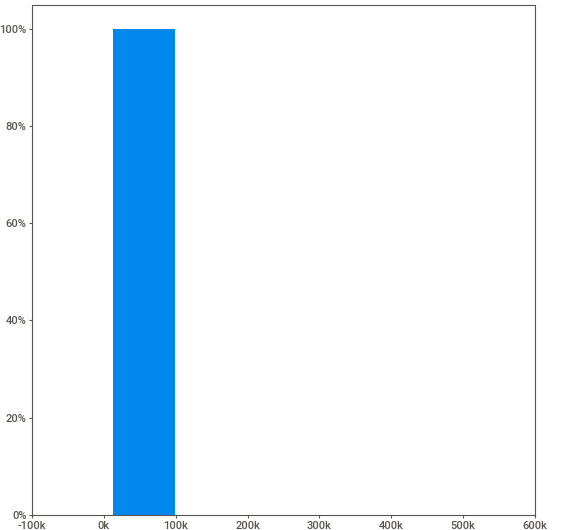
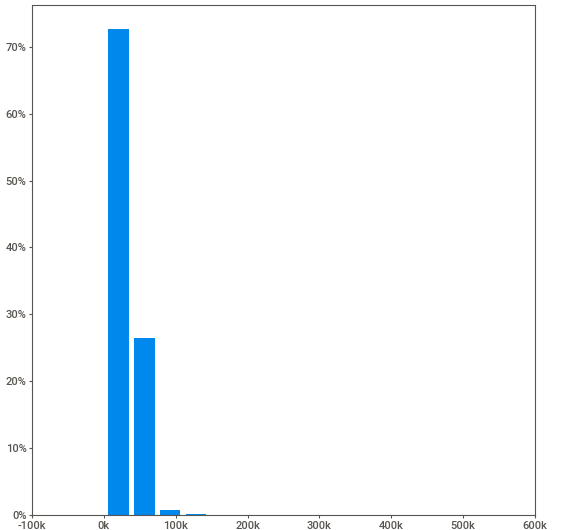
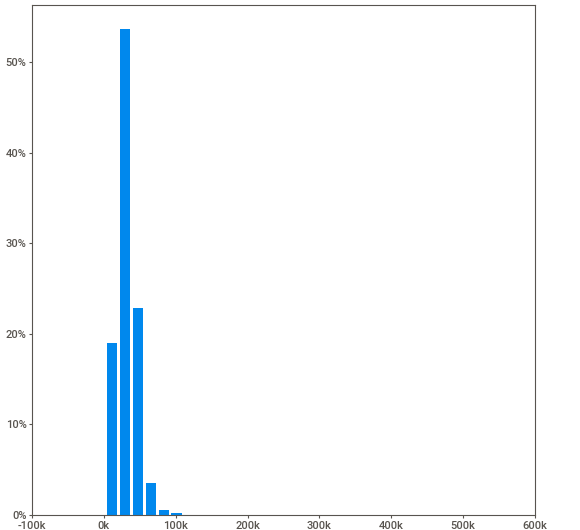
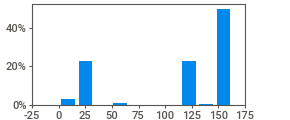
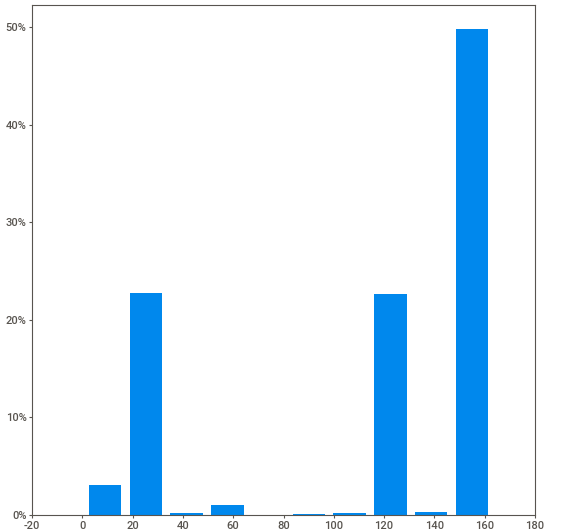
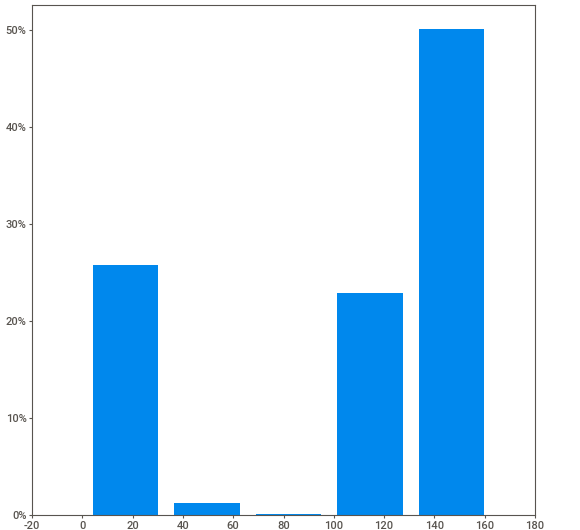
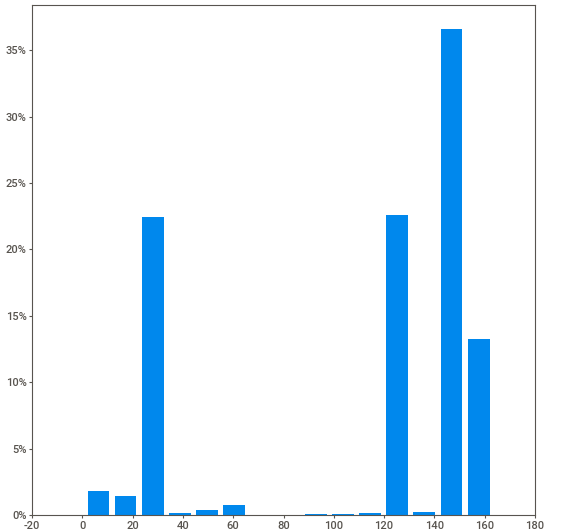
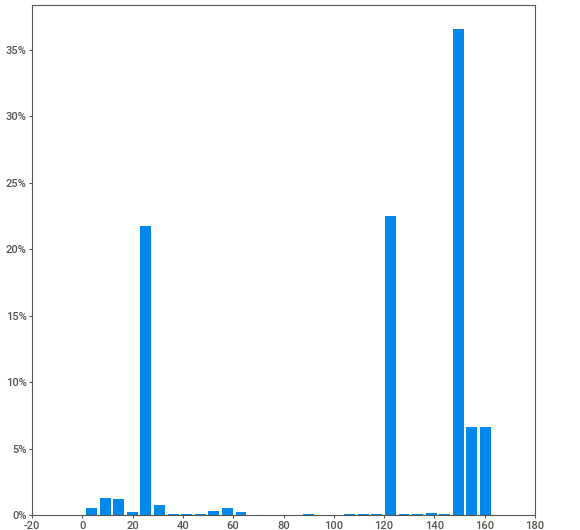
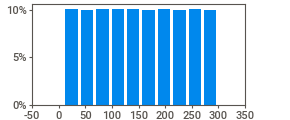
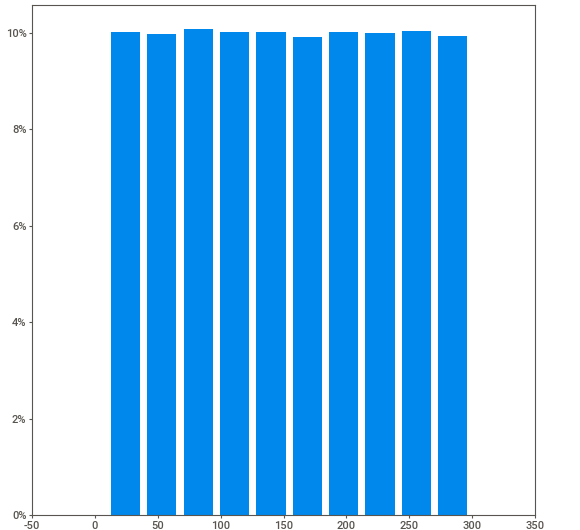
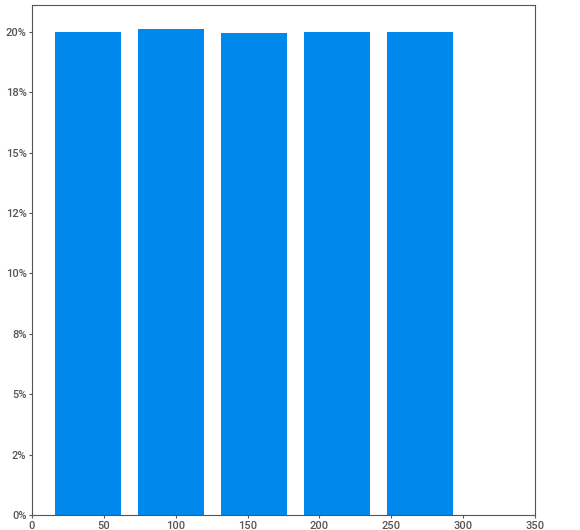
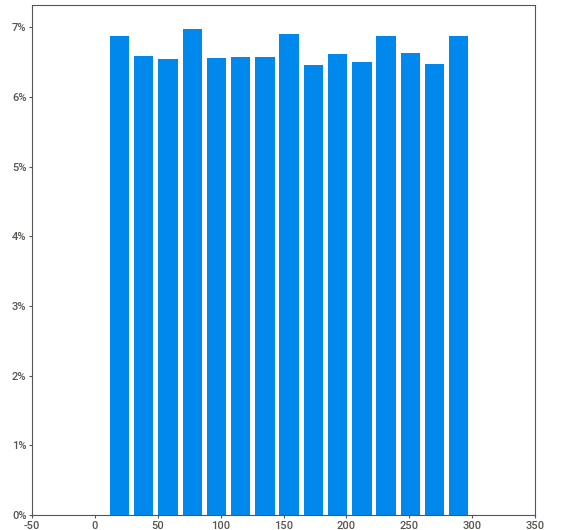
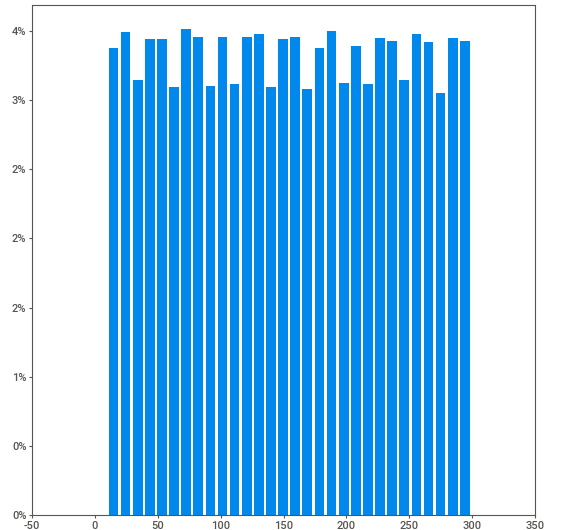
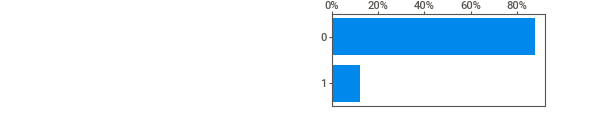
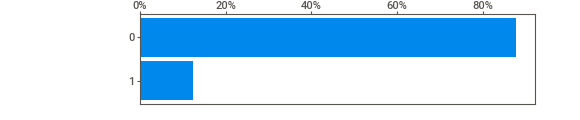
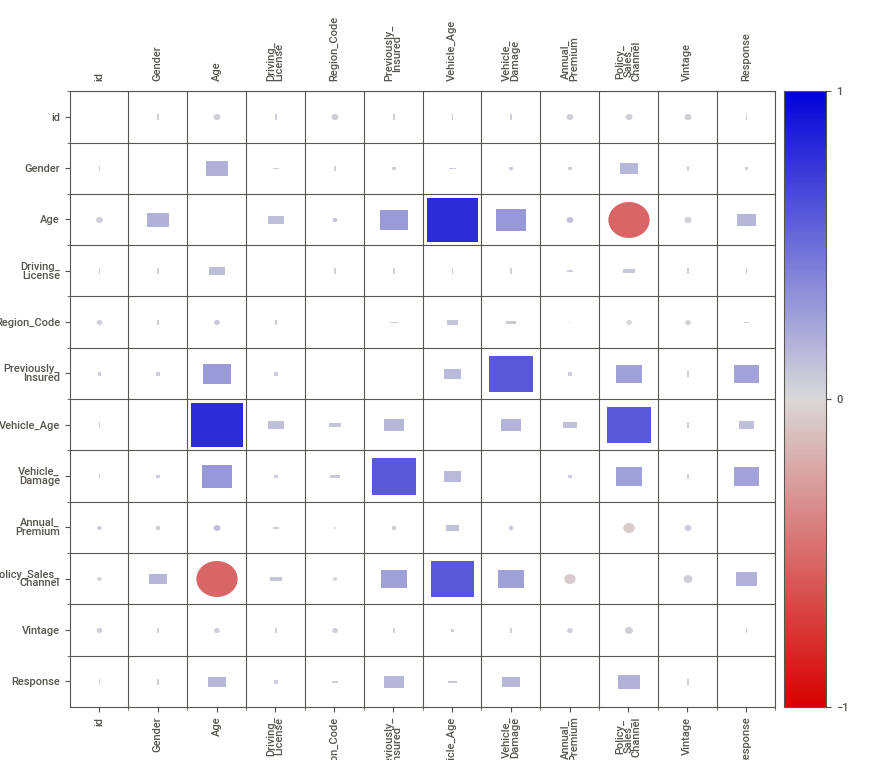
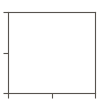

In [39]:
my_report.show_notebook()

### D-Tale

## Plot the DT